In [1]:
%run setup.ipynb
%matplotlib inline

In [2]:
dist_sq = np.array([[0, 1, 2, 3, 4, 0],
                    [1, 0, 2, 2, 5, 1],
                    [2, 2, 0, 2, 4, 1],
                    [3, 2, 2, 0, 1, 1],
                    [4, 5, 4, 1, 0, 1],
                    [0, 1, 1, 1, 1, 0]])

In [3]:
dist = scipy.spatial.distance.squareform(dist_sq)

In [4]:
z = scipy.cluster.hierarchy.average(dist)
z

array([[ 0.        ,  5.        ,  0.        ,  2.        ],
       [ 1.        ,  6.        ,  1.        ,  3.        ],
       [ 3.        ,  4.        ,  1.        ,  2.        ],
       [ 2.        ,  7.        ,  1.66666667,  4.        ],
       [ 8.        ,  9.        ,  2.75      ,  6.        ]])

In [5]:
%load_ext autoreload
%autoreload 1
%aimport hapclust

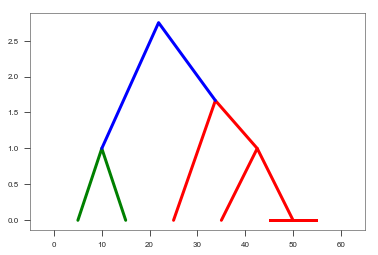

In [11]:
hapclust.cladogram(z, lw=3);

In [12]:
colors = np.array(list('rrrbbr'))

In [16]:
colors.ndim

1

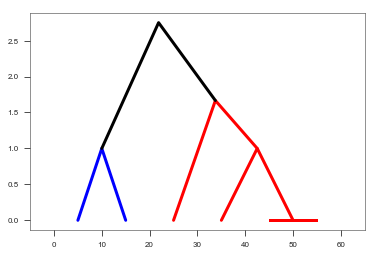

In [19]:
hapclust.cladogram(z, colors=colors, lw=3);

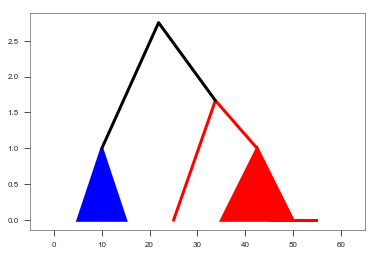

In [20]:
hapclust.cladogram(z, colors=colors, fill_threshold=1, lw=3);

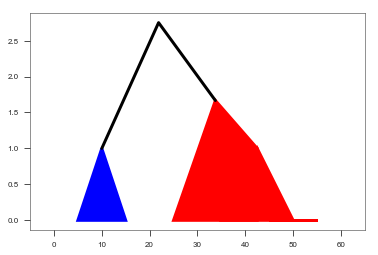

In [21]:
hapclust.cladogram(z, colors=colors, fill_threshold=2, lw=3);

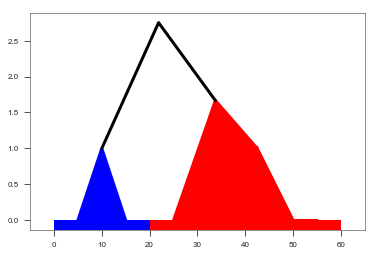

In [22]:
hapclust.cladogram(z, colors=colors, fill_threshold=2, leaf_height=1, lw=3);

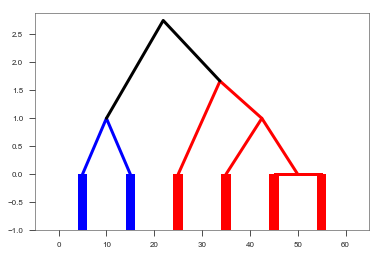

In [23]:
fig, ax = plt.subplots()
hapclust.cladogram(z, colors=colors, fill_threshold=0, leaf_height=1, 
                   leaf_width=2, lw=3, ax=ax)
ax.set_ylim(bottom=-1);

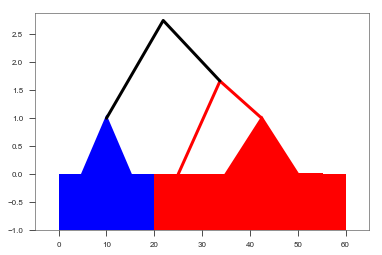

In [24]:
fig, ax = plt.subplots()
hapclust.cladogram(z, colors=colors, fill_threshold=1, leaf_height=1, 
                   leaf_width=10, lw=3, ax=ax)
ax.set_ylim(bottom=-1);

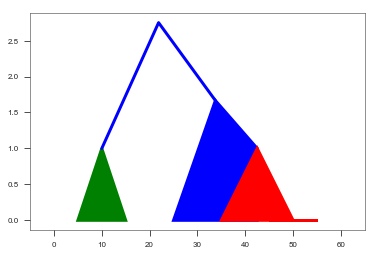

In [25]:
hapclust.cladogram(z, fill_threshold=2, color_threshold=1.1, lw=3);

In [26]:
tree = scipy.cluster.hierarchy.to_tree(z)

In [27]:
tree.get_descendant(6).pre_order()

[0, 5]

In [28]:
tree.pre_order()

[3, 4, 2, 1, 0, 5]

In [29]:
tree.left.pre_order()

[3, 4]

In [30]:
tree.left.dist

1.0

In [31]:
import hapclust

In [32]:
r = scipy.cluster.hierarchy.dendrogram(z, 
                                       distance_sort='descending', 
                                       color_threshold=0,
                                       no_plot=True,
                                       ax=ax)
r

{'color_list': ['b', 'b', 'b', 'b', 'b'],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [1.0, 1.6666666666666667, 1.6666666666666667, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [1.6666666666666667, 2.75, 2.75, 1.0]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [26.25, 26.25, 50.0, 50.0]],
 'ivl': ['5', '0', '1', '2', '4', '3'],
 'leaves': [5, 0, 1, 2, 4, 3]}

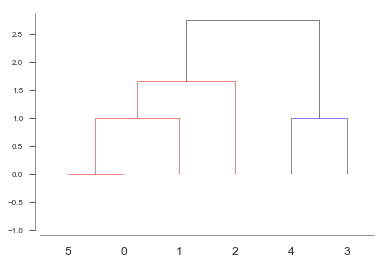

In [33]:
fig, ax = plt.subplots()
sns.despine(ax=ax, offset=5)

colors = np.array(list('rrrbbr'))

def link_color_func(k):
    leaves = tree.get_descendant(k).pre_order()
    leaf_colors = set(colors[leaves])
    if len(leaf_colors) > 1:
        return 'k'
    else:
        return colors[leaves[0]]

r = scipy.cluster.hierarchy.dendrogram(z, 
                                       distance_sort='descending', 
                                       color_threshold=0,
                                       link_color_func=link_color_func,
                                       ax=ax)

ax.set_ylim(bottom=-1);

In [34]:
r

{'color_list': ['r', 'r', 'r', 'b', 'k'],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [1.0, 1.6666666666666667, 1.6666666666666667, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [1.6666666666666667, 2.75, 2.75, 1.0]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [26.25, 26.25, 50.0, 50.0]],
 'ivl': ['5', '0', '1', '2', '4', '3'],
 'leaves': [5, 0, 1, 2, 4, 3]}

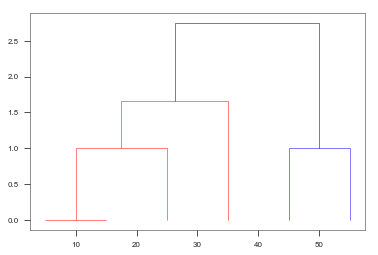

In [35]:
fig, ax = plt.subplots()
for x, y, c in zip(r['icoord'], r['dcoord'], r['color_list']):
    ax.plot(x, y, color=c)

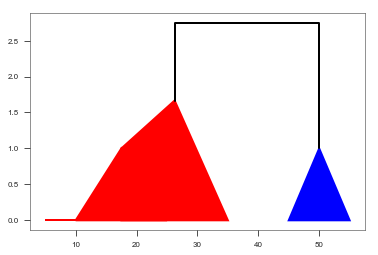

In [36]:
fig, ax = plt.subplots()
thresh = 2
for x, y, c in zip(r['icoord'], r['dcoord'], r['color_list']):
    x1, x2, x3, x4 = x
    y1, y2, y3, y4 = y
    if y2 > thresh:
        ax.plot(x, y, color=c, lw=2)
    else:
        ax.add_patch(mpl.patches.Polygon([[x1, min(y1, y4)], [x1, y1], [(x2 + x3)/2, y2], [x4, y4], [x4, min(y1, y4)]], color=c, lw=2))

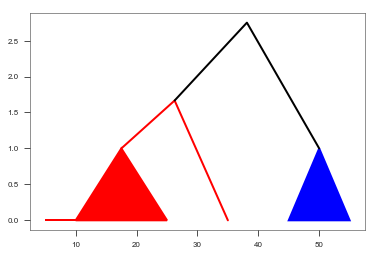

In [37]:
fig, ax = plt.subplots()
thresh = 1
for x, y, c in zip(r['icoord'], r['dcoord'], r['color_list']):
    x1, x2, x3, x4 = x
    y1, y2, y3, y4 = y
    if y2 > thresh:
        ax.plot([x1, (x2 + x3)/2, x4], [y1, y2, y4], color=c, lw=2)
    else:
        ax.add_patch(mpl.patches.Polygon([[x1, min(y1, y4)], [x1, y1], [(x2 + x3)/2, y2], [x4, y4], [x4, min(y1, y4)]], color=c, lw=2))

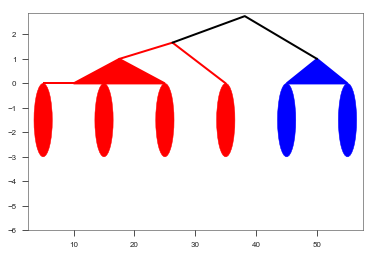

In [38]:

fig, ax = plt.subplots()
thresh = 1
for x, y, c in zip(r['icoord'], r['dcoord'], r['color_list']):
    x1, x2, x3, x4 = x
    y1, y2, y3, y4 = y
    if y2 > thresh:
        ax.plot([x1, (x2 + x3)/2, x4], [y1, y2, y4], color=c, lw=2)
    else:
        ax.add_patch(mpl.patches.Polygon([[x1, min(y1, y4)], [x1, y1], [(x2 + x3)/2, y2], [x4, y4], [x4, min(y1, y4)]], color=c, lw=2))
        
# add tips
tip_height = 3

for i, l in enumerate(r['leaves']):
    # circle
    x = 5 + i * 10
    ax.add_patch(plt.Circle((x, -tip_height/2), radius=tip_height/2, color=colors[l]))
    
ax.set_ylim(bottom=-tip_height*2);

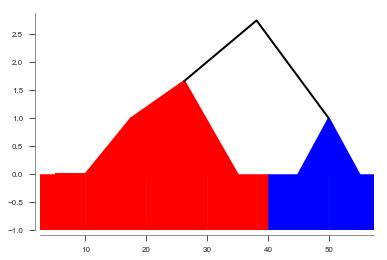

In [39]:

fig, ax = plt.subplots()
sns.despine(ax=ax, offset=5)
thresh = 2
for x, y, c in zip(r['icoord'], r['dcoord'], r['color_list']):
    x1, x2, x3, x4 = x
    y1, y2, y3, y4 = y
    if y2 > thresh:
        ax.plot([x1, (x2 + x3)/2, x4], [y1, y2, y4], color=c, lw=2)
    else:
        ax.add_patch(mpl.patches.Polygon([[x1, min(y1, y4)], [x1, y1], [(x2 + x3)/2, y2], [x4, y4], [x4, min(y1, y4)]], color=c, lw=2))
        
# add tips
tip_height = 1

for i, l in enumerate(r['leaves']):
    # rectangle
    ax.add_patch(plt.Rectangle((i * 10, -tip_height), width=10, height=tip_height, color=colors[l]))
    
ax.set_ylim(bottom=-tip_height);

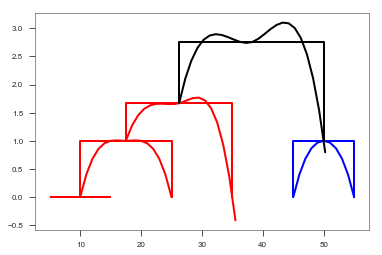

In [70]:
fig, ax = plt.subplots()
thresh = 0
spline_xstep = 1
spline_yfrac = .4
for x, y, c in zip(r['icoord'], r['dcoord'], r['color_list']):
    x1, x2, x3, x4 = x
    y1, y2, y3, y4 = y
    if y2 > thresh:
        ax.plot(x, y, color=c, lw=2)
        x = [x1, x1+1, (x2 + x3)/2, x4-1, x4]
        y = [y1, y1 + spline_yfrac*(y2-y1), y2, y4 + spline_yfrac*(y3-y4), y4]
        tck = scipy.interpolate.splrep(x, y, s=0, k=3)
        xnew = np.arange(x1, x4+spline_xstep, spline_xstep)
        ynew = scipy.interpolate.splev(xnew, tck, der=0)
        ax.plot(xnew, ynew, color=c, lw=2)
    else:
        ax.add_patch(mpl.patches.Polygon([[x1, min(y1, y4)], [x1, y1], [(x2 + x3)/2, y2], [x4, y4], [x4, min(y1, y4)]], color=c, lw=2))

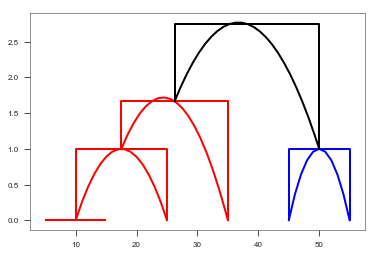

In [85]:
fig, ax = plt.subplots()
thresh = 0
spline_xstep = 1
spline_yfrac = .6

for x, y, c in zip(r['icoord'], r['dcoord'], r['color_list']):
    x1, x2, x3, x4 = x
    y1, y2, y3, y4 = y
    if y2 > thresh:
        ax.plot(x, y, color=c, lw=2)
        x = [x1, (x2 + x3)/2, x4]
        y = [y1, y2, y4]
        tck = scipy.interpolate.splrep(x, y, s=0, k=2)
        xnew = np.append(np.arange(x1, x4, spline_xstep), [x4])
        ynew = scipy.interpolate.splev(xnew, tck, der=0)
        ax.plot(xnew, ynew, color=c, lw=2)
    else:
        ax.add_patch(mpl.patches.Polygon([[x1, min(y1, y4)], [x1, y1], [(x2 + x3)/2, y2], [x4, y4], [x4, min(y1, y4)]], color=c, lw=2))

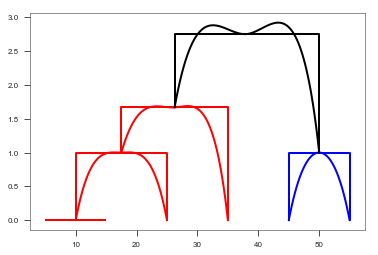

In [102]:
fig, ax = plt.subplots()
thresh = 0
spline_xstep = 10
spline_yfrac = .4

for x, y, c in zip(r['icoord'], r['dcoord'], r['color_list']):
    x1, x2, x3, x4 = x
    y1, y2, y3, y4 = y
    if y2 > thresh:
        ax.plot(x, y, color=c, lw=2)
        x = [x1, x2+1, (x2 + x3)/2, x3-1, x4]
        y = [y1, y1 + spline_yfrac * (y2 - y1), y2, y4 + spline_yfrac * (y3 - y4), y4]
        tck, u = scipy.interpolate.splprep(np.column_stack([x, y]).transpose(), s=0)
        unew = np.linspace(0, 1, 100)
        out = scipy.interpolate.splev(unew, tck, der=0)
        ax.plot(out[0], out[1], color=c, lw=2)
    else:
        ax.add_patch(mpl.patches.Polygon([[x1, min(y1, y4)], [x1, y1], [(x2 + x3)/2, y2], [x4, y4], [x4, min(y1, y4)]], color=c, lw=2))

In [154]:
tree.

False

In [160]:
tree.left.left.count

1

In [177]:
def plot_clade(node, offset, ax):
    
    if node.is_leaf():
        pass
    
    else:
        # figure out where the apex will go
        left, right = node.left, node.right
        # count sort
        if left.count > right.count:
            left, right = right, left
            
        apex = offset + left.count * 10

        # figure out where the apex of child nodes are
        right_offset = offset + left.count * 10
        if left.is_leaf():
            apex_left = offset + 5
        else:
            apex_left = offset + min(left.left.count, left.right.count) * 10
        if right.is_leaf():
            apex_right = right_offset + 5
        else:
            apex_right = right_offset + min(right.left.count, right.right.count) * 10

        # plot lines
        ax.plot([apex_left, apex, apex_right], [left.dist, node.dist, right.dist], lw=4)

        # recurse
        plot_clade(node.left, offset=offset, ax=ax)
        plot_clade(node.right, offset=right_offset, ax=ax)

def plot_cladogram(tree, ax=None):
    
    if ax is None:
        fig, ax = plt.subplots()

    plot_clade(tree, offset=0, ax=ax)
    
    
    
    

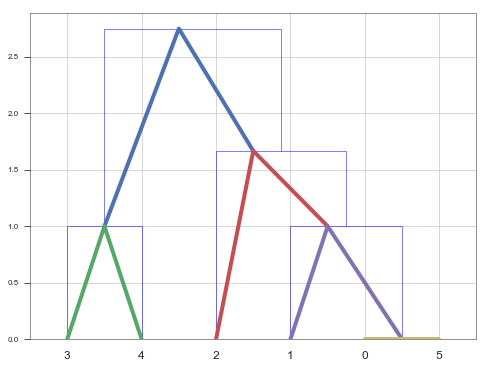

In [178]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_cladogram(tree, ax=ax)
scipy.cluster.hierarchy.dendrogram(z, 
                                   count_sort=True, 
                                   color_threshold=0,
                                   ax=ax)
ax.grid(axis='both')

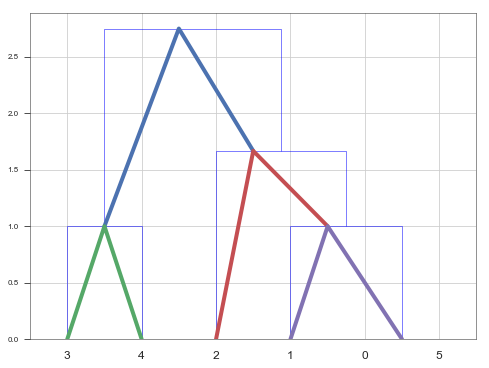

In [184]:
fig, ax = plt.subplots(figsize=(8, 6))
hapclust.cladogram(z, ax=ax, plot_kws=dict(lw=4))
scipy.cluster.hierarchy.dendrogram(z, 
                                   count_sort=True, 
                                   color_threshold=0,
                                   ax=ax)
ax.grid(axis='both')

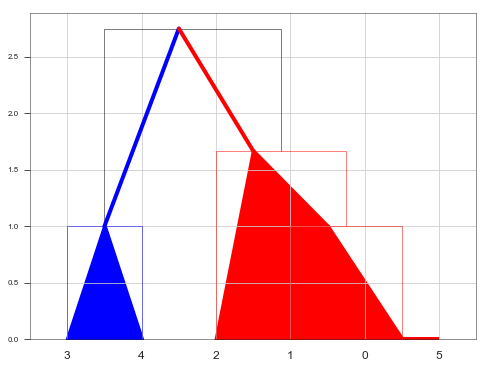

In [226]:
fig, ax = plt.subplots(figsize=(8, 6))
hapclust.cladogram(z, fill_threshold=2, ax=ax, colors=colors, plot_kws=dict(lw=4), 
                   fill_kws=dict(linewidth=4))
scipy.cluster.hierarchy.dendrogram(z, 
                                   count_sort=True, 
                                   color_threshold=0,
                                   link_color_func=link_color_func,
                                   ax=ax)
ax.grid(axis='both')

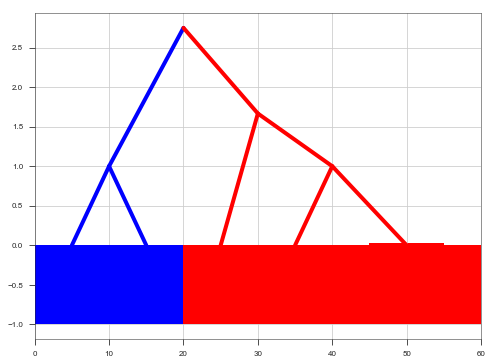

In [220]:
fig, ax = plt.subplots(figsize=(8, 6))
hapclust.cladogram(z, fill_threshold=0, ax=ax, colors=colors, leaf_height=1, 
                   plot_kws=dict(lw=4), 
                   fill_kws=dict(linewidth=4))
# scipy.cluster.hierarchy.dendrogram(z, 
#                                    count_sort=True, 
#                                    color_threshold=0,
#                                    link_color_func=link_color_func,
#                                    ax=ax)
ax.grid(axis='both')

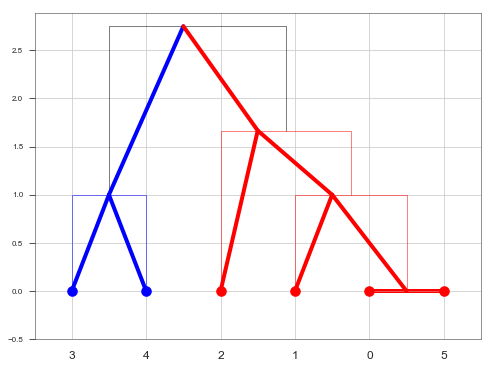

In [225]:
fig, ax = plt.subplots(figsize=(8, 6))
hapclust.cladogram(z, fill_threshold=0, ax=ax, colors=colors, 
                   plot_leaf_func=hapclust.leaf_plotter_marker(marker='o', markersize=10), 
                   plot_kws=dict(lw=4), 
                   fill_kws=dict(linewidth=4))
scipy.cluster.hierarchy.dendrogram(z, 
                                   count_sort=True, 
                                   color_threshold=0,
                                   link_color_func=link_color_func,
                                   ax=ax)
ax.set_ylim(bottom=-.5)
ax.grid(axis='both')

In [ ]:
fig, ax = plt.subplots()
thresh = 0
spline_xstep = 10
spline_yfrac = .4

for x, y, c in zip(r['icoord'], r['dcoord'], r['color_list']):
    x1, x2, x3, x4 = x
    y1, y2, y3, y4 = y
    if y2 > thresh:
        ax.plot(x, y, color=c, lw=2)
        x = [x1, (x2 + x3)/2, x4]
        y = [y1, y2, y4]
        tck, u = scipy.interpolate.splprep(np.column_stack([x, y]).transpose(), s=0, k=2)
        unew = np.linspace(0, 1, 100)
        out = scipy.interpolate.splev(unew, tck, der=0)
        ax.plot(out[0], out[1], color=c, lw=2)
    else:
        ax.add_patch(mpl.patches.Polygon([[x1, min(y1, y4)], [x1, y1], [(x2 + x3)/2, y2], [x4, y4], [x4, min(y1, y4)]], color=c, lw=2))

In [54]:
x1, x2, x3, x4 = 5, 5, 15, 15
y1, y2, y3, y4 = 0, 1, 1, 0
x = [x1, x1+1, (x2 + x3)/2, x4-1, x4]
y = [y1, y1 + spline_yfrac*(y2-y1), y2, y4 + spline_yfrac*(y3-y4), y4]
tck = scipy.interpolate.splrep(x, y, s=0, k=3)
xnew = np.arange(x1, x4+spline_xstep, spline_xstep)
ynew = scipy.interpolate.splev(xnew, tck, der=0)


In [55]:
x

[5, 6, 10.0, 14, 15]

In [56]:
y

[0, 0.5, 1, 0.5, 0]

In [57]:
xnew

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [58]:
ynew

array([  2.80833433e-17,   5.00000000e-01,   7.97500000e-01,
         9.45000000e-01,   9.95000000e-01,   1.00000000e+00,
         9.95000000e-01,   9.45000000e-01,   7.97500000e-01,
         5.00000000e-01,   0.00000000e+00])

In [ ]:
x1, x2, x3, x4 = 5, 5, 15, 15
y1, y2, y3, y4 = 0, 1, 1, 0
x = [x1, x1+1, (x2 + x3)/2, x4-1, x4]
y = [y1, y1 + spline_yfrac*(y2-y1), y2, y4 + spline_yfrac*(y3-y4), y4]
tck = scipy.interpolate.splrep(x, y, s=0, k=3)
xnew = np.arange(x1, x4+spline_xstep, spline_xstep)
ynew = scipy.interpolate.splev(xnew, tck, der=0)


In [122]:
def rescale(y):
    return (y - y.min()) / (y.max() - y.min())

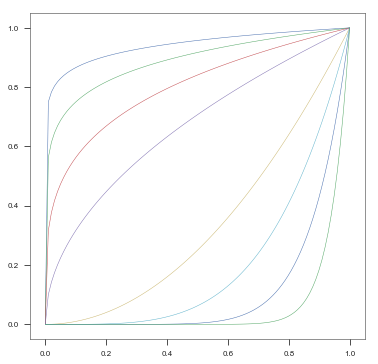

In [138]:
fig, ax = plt.subplots(figsize=(6, 6))
for n in 1/16, 1/8, 1/4, 1/2, 2, 4, 8, 16:
    x = np.linspace(0, 100, 100) 
    y = x**n
    ax.plot(rescale(x), rescale(y));
#ax.set_xscale('log')